In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,year,month,supplier,item_code,item_description,item_type,retail_sales,retail_transfers,warehouse_sales
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              307645 non-null  int64  
 1   month             307645 non-null  int64  
 2   supplier          307478 non-null  object 
 3   item_code         307645 non-null  object 
 4   item_description  307645 non-null  object 
 5   item_type         307644 non-null  object 
 6   retail_sales      307642 non-null  float64
 7   retail_transfers  307645 non-null  float64
 8   warehouse_sales   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


DATA CLEANING

In [4]:
# Check the count of missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
year                  0
month                 0
supplier            167
item_code             0
item_description      0
item_type             1
retail_sales          3
retail_transfers      0
warehouse_sales       0
dtype: int64


In [5]:
df['supplier'] = df['supplier'].fillna('Unknown')
df = df.dropna(subset = ['item_type', 'retail_sales'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307641 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              307641 non-null  int64  
 1   month             307641 non-null  int64  
 2   supplier          307641 non-null  object 
 3   item_code         307641 non-null  object 
 4   item_description  307641 non-null  object 
 5   item_type         307641 non-null  object 
 6   retail_sales      307641 non-null  float64
 7   retail_transfers  307641 non-null  float64
 8   warehouse_sales   307641 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 23.5+ MB


FEATURE ENGINEERING

In [ ]:
df['total_sales'] = df['retail_sales'] + df['warehouse_sales']

In [9]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))
df['date']

0        2020-01-01
1        2020-01-01
2        2020-01-01
3        2020-01-01
4        2020-01-01
            ...    
307640   2020-09-01
307641   2020-09-01
307642   2020-09-01
307643   2020-09-01
307644   2020-09-01
Name: date, Length: 307641, dtype: datetime64[ns]

In [10]:
df.head()

,year,month,supplier,item_code,item_description,item_type,retail_sales,retail_transfers,warehouse_sales,total_sales,date
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2.00,2020-01-01
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,4.00,2020-01-01
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,1.00,2020-01-01
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,1.00,2020-01-01
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,0.82,2020-01-01


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307641 entries, 0 to 307644
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   year              307641 non-null  int64         
 1   month             307641 non-null  int64         
 2   supplier          307641 non-null  object        
 3   item_code         307641 non-null  object        
 4   item_description  307641 non-null  object        
 5   item_type         307641 non-null  object        
 6   retail_sales      307641 non-null  float64       
 7   retail_transfers  307641 non-null  float64       
 8   warehouse_sales   307641 non-null  float64       
 9   total_sales       307641 non-null  float64       
 10  date              307641 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 28.2+ MB


TIME SERIES ANALYSIS: TOTAL SALES OVER TIME

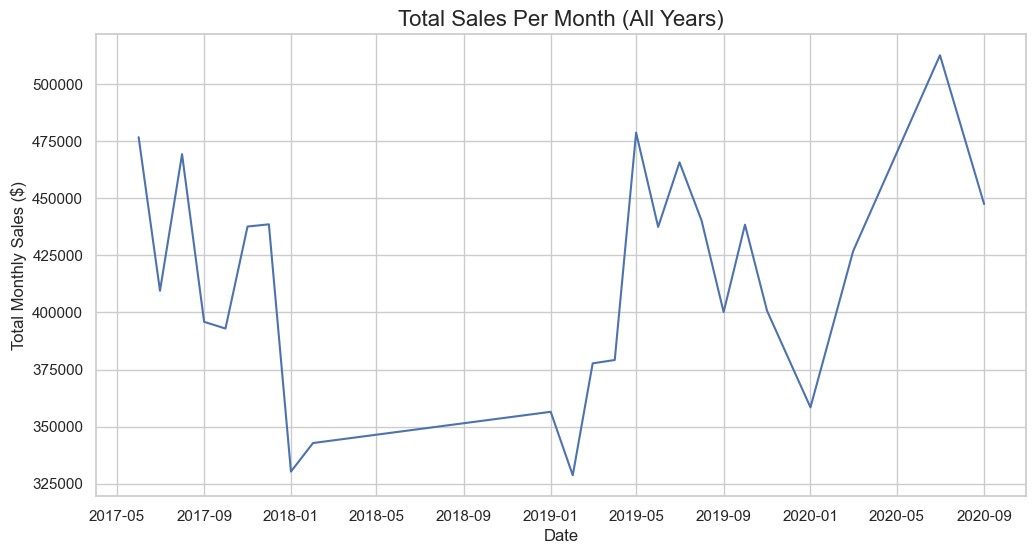

In [ ]:
sns.set(style = "whitegrid")
monthly_sales = df.groupby('date')['total_sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='date', y='total_sales')
plt.title('Total Sales Per Month (All Years)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Monthly Sales ($)')
plt.show()

INSIGHTS
- High volatility: Extreme fluctuations from month to month possible due to bulk Sales, Autions, Invetory Driven, or Events
- 2018 Slumps : There is dramatic drop in sales at the start of the 2018, sales hit their lowest point but slowly recovering, possibly caused due to change in policy, loss of a major supplier, a warehouse being temporarily shutdown or fall in demand.
- 2019 recovery : In 2019, sales start to recover from the 2018 fall from the first month and significant increase in sales.
- Strong Growth : There is a significant increase in sales from day 1 and continues to increase, reaching it peak performance in the 7th month.
- Pattern : There is a pattern in the data where the sales start to drop from mid year and start to recover from the beginning of the next year and the cycle is repeated in 2017, 2019 and 2020, in 2018 the sales are low mostly due to a ware being shut or potential loss of a supplier.

TOP PERFORMING ITEM

C:\Users\manis\AppData\Local\Temp\ipykernel_11996\2067117856.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_performance.values, y=item_performance.index, palette='viridis')


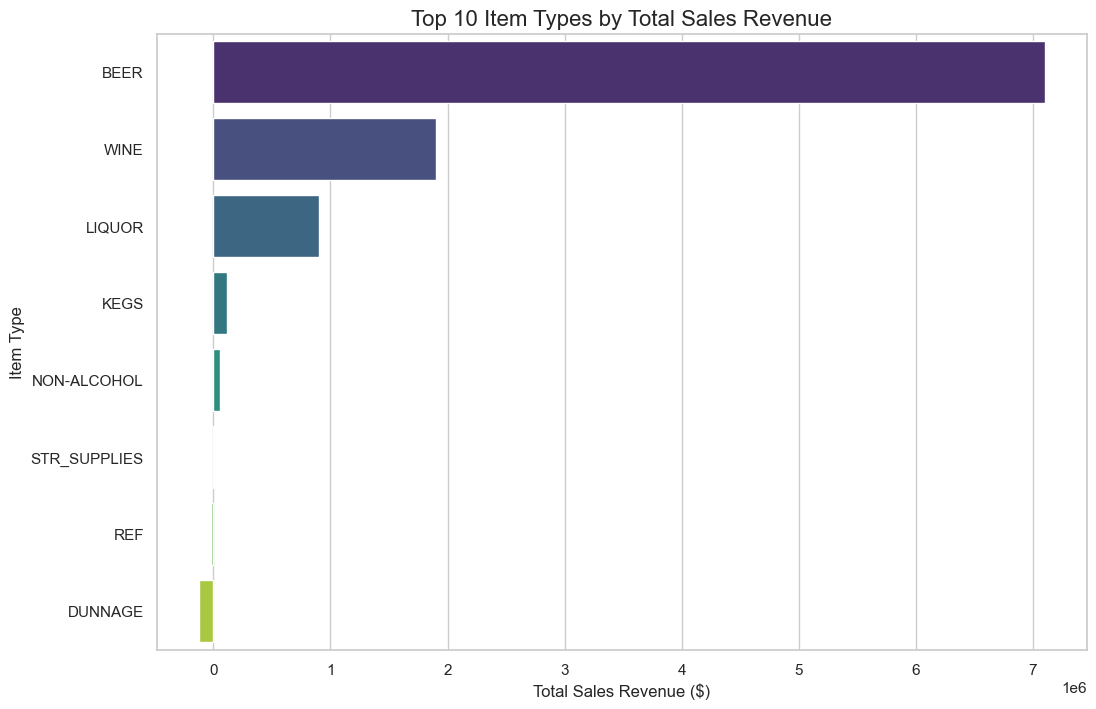

In [13]:
item_performance = df.groupby('item_type')['total_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=item_performance.values, y=item_performance.index, palette='viridis')
plt.title('Top 10 Item Types by Total Sales Revenue', fontsize=16)
plt.xlabel('Total Sales Revenue ($)')
plt.ylabel('Item Type')
plt.show()

INSIGHTS
- BEER is the dominant driver of the business, it is more that 3x of the next category which is WINE
- Top 3 categories BEER, WINE, and LIQUOR make up the vast majority of the total revenue
- DUNNAGE refers to the meterial used to store or secure the goods, in this case beverages, Eg: Kegs, pallets, Crates etc which will be returned
- DUNNAGE is in negetive because when the returned amount is more that the amount of new dunnage sold, this return/refund transaction is recorded as negative sale because the money is going back to customer from the business.

SALES OF TOP 3 CATEGORIES OVER TIME

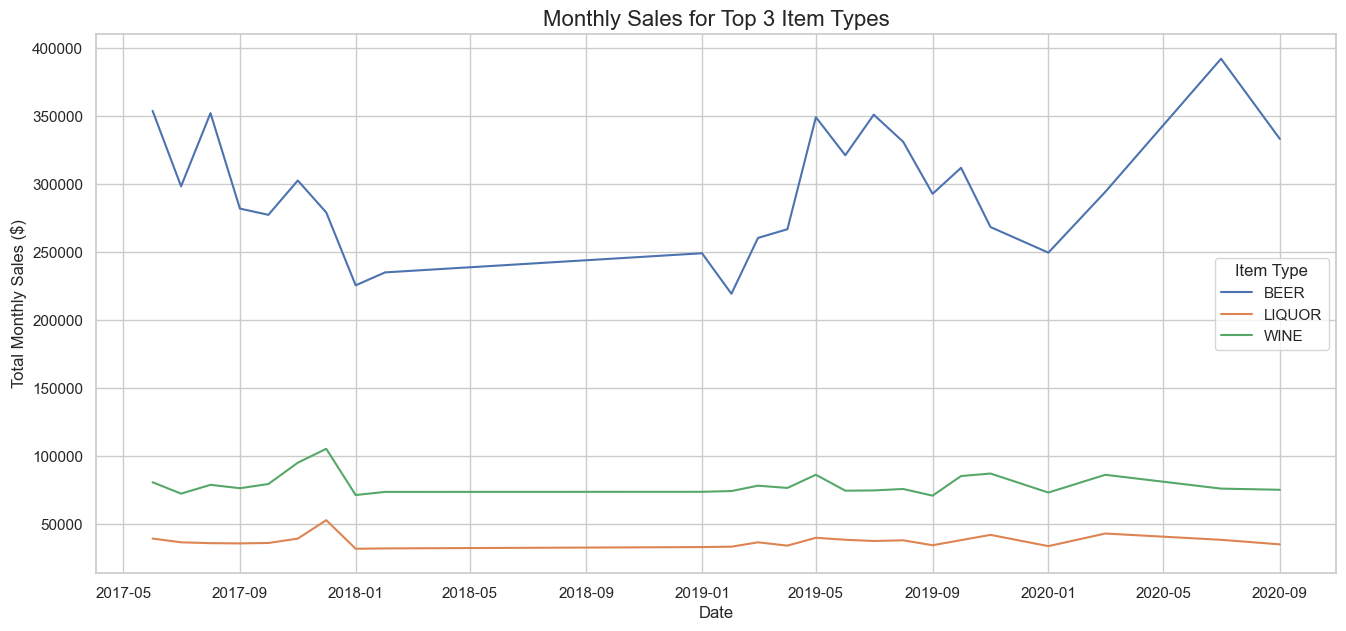

In [14]:
top_items = ['BEER', 'WINE', 'LIQUOR']
df_top_items = df[df['item_type'].isin(top_items)]

performance_over_time = df_top_items.groupby(['date', 'item_type'])['total_sales'].sum().reset_index()

plt.figure(figsize=(16, 7))
sns.lineplot(data=performance_over_time, x='date', y='total_sales', hue='item_type')
plt.title('Monthly Sales for Top 3 Item Types', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Monthly Sales ($)')
plt.legend(title='Item Type')
plt.show()

INSIGHTS
- BEER dictates the overall business performance, the business is almost entirely depends on the performance of the BEER
- The 2018 slump was a "BEER problem", the major sales downturn was caused exclusively by the drop in BEER sales, the problem was not a general market issue it was somewhere near the supply chain or demand
- WINE and LIQUOR were stable
- 2020 peak was also caused due to rise in BEER sales

BEER SUPPLIERS

C:\Users\manis\AppData\Local\Temp\ipykernel_11996\3669520407.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=beer_supplier_performance.values, y=beer_supplier_performance.index, palette='rocket')


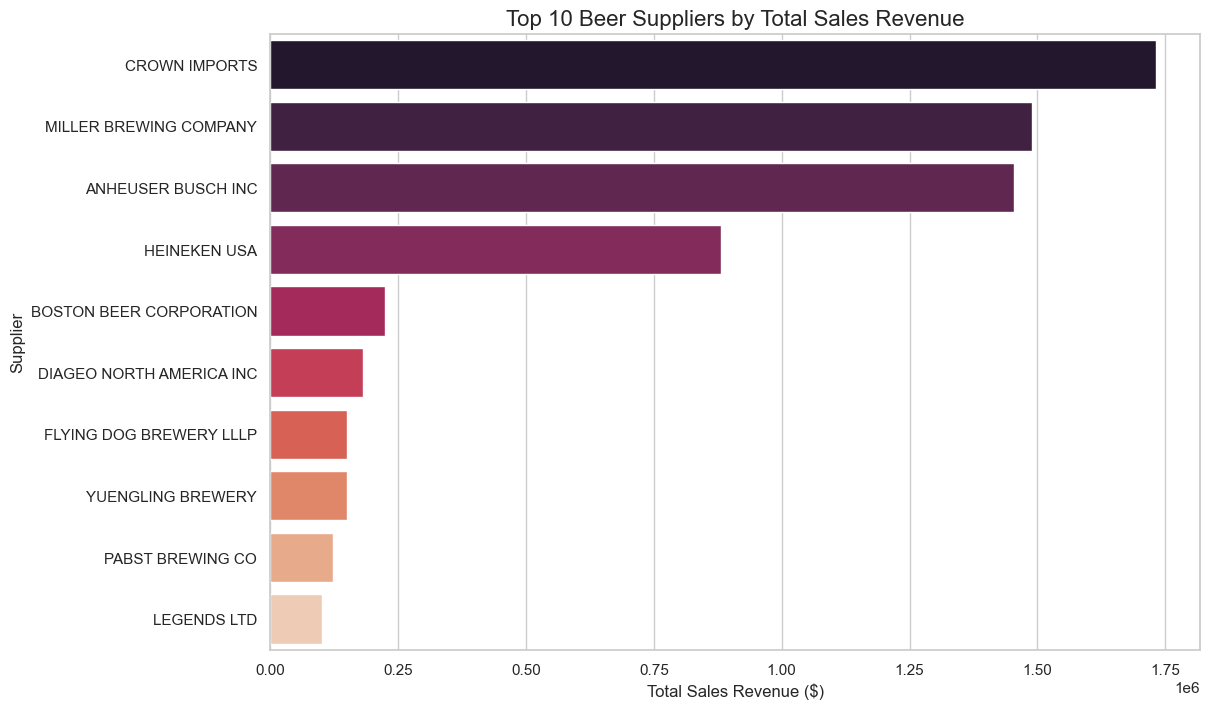

In [15]:
df_beer = df[df['item_type'] == 'BEER'].copy()

beer_supplier_performance = df_beer.groupby('supplier')['total_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=beer_supplier_performance.values, y=beer_supplier_performance.index, palette='rocket')
plt.title('Top 10 Beer Suppliers by Total Sales Revenue', fontsize=16)
plt.xlabel('Total Sales Revenue ($)')
plt.ylabel('Supplier')
plt.show()

In [16]:
df_beer_2017 = df_beer[df_beer['year'] == 2017].copy()

top_suppliers_2017 = df_beer_2017.groupby('supplier')['total_sales'].sum().sort_values(ascending=False).reset_index()
print("--- Top Beer Suppliers in 2017 ---")
print(top_suppliers_2017.head(10))

df_beer_2018 = df_beer[df_beer['year'] == 2018].copy()

top_suppliers_2018 = df_beer_2018.groupby('supplier')['total_sales'].sum().sort_values(ascending=False).reset_index()
print("\n--- Top Beer Suppliers in 2018 ---")
print(top_suppliers_2018.head(10))

--- Top Beer Suppliers in 2017 ---
                   supplier  total_sales
0             CROWN IMPORTS    501610.04
1    MILLER BREWING COMPANY    479216.27
2        ANHEUSER BUSCH INC    456780.54
3              HEINEKEN USA    272050.05
4   BOSTON BEER CORPORATION     50823.82
5         YUENGLING BREWERY     49185.67
6  DIAGEO NORTH AMERICA INC     45891.69
7   FLYING DOG BREWERY LLLP     43965.34
8          PABST BREWING CO     43147.24
9               LEGENDS LTD     29606.91

--- Top Beer Suppliers in 2018 ---
                   supplier  total_sales
0    MILLER BREWING COMPANY    106634.03
1             CROWN IMPORTS    101611.35
2        ANHEUSER BUSCH INC     95939.16
3              HEINEKEN USA     57448.63
4  DIAGEO NORTH AMERICA INC     10896.90
5   FLYING DOG BREWERY LLLP     10823.87
6         YUENGLING BREWERY     10553.30
7          PABST BREWING CO      9946.33
8   BOSTON BEER CORPORATION      9769.75
9               LEGENDS LTD      7054.98
